<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Stuff" data-toc-modified-id="Import-Stuff-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Stuff</a></span><ul class="toc-item"><li><span><a href="#NOTE" data-toc-modified-id="NOTE-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>NOTE</a></span></li><li><span><a href="#Anonymous-Functions" data-toc-modified-id="Anonymous-Functions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Anonymous Functions</a></span></li><li><span><a href="#Named-Functions" data-toc-modified-id="Named-Functions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Named Functions</a></span></li></ul></li><li><span><a href="#Convergence-Test" data-toc-modified-id="Convergence-Test-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Convergence Test</a></span><ul class="toc-item"><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li><li><span><a href="#Potential-Maps-vs-Relative-Angle" data-toc-modified-id="Potential-Maps-vs-Relative-Angle-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Potential Maps vs Relative Angle</a></span><ul class="toc-item"><li><span><a href="#Relative-Angle-Fit" data-toc-modified-id="Relative-Angle-Fit-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Relative Angle Fit</a></span></li><li><span><a href="#Zeroed-Relative-Angle-Maps" data-toc-modified-id="Zeroed-Relative-Angle-Maps-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Zeroed Relative Angle Maps</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li><li><span><a href="#Compare-Zeroed-Antiferro-Maps" data-toc-modified-id="Compare-Zeroed-Antiferro-Maps-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Compare Zeroed Antiferro Maps</a></span><ul class="toc-item"><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li></ul></div>

# Import Stuff

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import pickle as pkl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FormatStrFormatter
from scipy import stats

sns.set(font_scale=1.5)
#sns.set_context("paper")

with open("tidy_data/pm_broad_sweep.pkl","rb") as _filein:
    raw_data = pkl.load(_filein)
    
raw_df = pd.DataFrame(raw_data)
raw_df.fill = raw_df.fill.apply(int)
raw_df.angle = raw_df.angle.apply(float)
raw_df.config = raw_df.config.apply(int)
raw_df.head()

,angle,config,energy,fill
0,0.0,0,-905.487915,1000
1,0.0,1,-905.487912,1000
2,0.0,10,-905.487957,1000
3,0.0,11,-905.487945,1000
4,0.0,12,-905.487929,1000


## NOTE

The convergence data is in this dataframe as well, and the information is encoded under `angle`.

- `angle` = 0.0001 $\rightarrow$ `EDIFF` = 1e-04
- `angle` = 1e-06 $\rightarrow$ `EDIFF` = 1e-06

## Anonymous Functions

In [2]:
filter_by_fill = lambda fill, df=raw_df: df[df.fill == fill]
filter_by_angle = lambda angle, df: df[df.angle == angle]

## Named Functions

In [38]:
def plot_map(fill=None,angle=None,ax=None):
    map_df = filter_by_angle(angle,filter_by_fill(fill))
    map_df.sort_values("config",axis=0,inplace=True)
    map_df.config *= np.pi/90
    sns.lineplot(x="config",y="energy",data=map_df,ax=ax,
                 label="Rel. Ang: {:.2f}".format(angle))

    
def plot_convergence_test():
    angle1 = 1e-04
    angle2 = 1e-06
    fill = 1010

    map_df = filter_by_angle(angle1,filter_by_fill(fill))
    map_df.sort_values("config",axis=0,inplace=True)
    map2_df = filter_by_angle(angle2,filter_by_fill(fill))
    map2_df.sort_values("config",axis=0,inplace=True)
    scale1 = np.pi/150
    scale2 = scale1
    map_df.config *= scale1
    map2_df.config *= scale2
    
#    fig = plt.figure(figsize=(12,8))
#    ax = plt.gca()
#    plt.plot(scale1*map_df.config.values,map_df.energy.values,
#                label="Fill: {}\nEDIFF: {}".format(fill,angle1))
#    plt.plot(scale1*map2_df.config.values,map2_df.energy.values,
#                label="Fill: {}\nEDIFF: {}".format(fill,angle2))
#    ax.legend()
#    ax.set(xlabel="Rotation [rad]",ylabel="Energy [eV]")
    
    fig = plt.figure(figsize=(12,9))
    gs = gridspec.GridSpec(nrows=2,ncols=1,figure=fig,hspace=0.5)
    ax = plt.subplot(gs[0,0])
    sns.barplot(x=map_df.config.values[:50],y=map_df.energy.values[:50]/map2_df.energy.values,color='green')
    ax.set(xlabel="Rotation [rad]",ylabel="Energy Ratio", ylim=[0.999,1.0001])
    labels = [item.get_text() for item in ax.get_xticklabels()]
    ax.set_xticklabels([str(round(float(label), 2)) for label in labels])
    _ = [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % 4 != 0]
    ax.axhline(1.0,color='red',ls='--')
    ax2 = plt.subplot(gs[1,0])
    ax2.plot(map_df.config.values[:150],(map_df.energy.values[:150]-map_df.energy.values[0])*1000.)
    ax2.set(xlabel="Rotation [rad]",ylabel="Energy [meV]",xlim=[0,np.pi])
    
def plot_relative_angle():
    #angles = set(raw_df.angle.values)
    #angles.discard(1e-04) # Don't want to look at energy convergence stuff
    #angles.discard(1e-06)
    angles = [0.0, 0.5235987756, 1.0471975512, 1.5707963268, 2.0943951024, 2.617993878, 3.1415926536]
    angles.sort()

    fig = plt.figure(figsize=(12,9))
    ax = plt.gca()

    for i,ang in enumerate(angles):
        plot_map(fill=1010,angle=ang,ax=ax)

    #ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=3)
    ax.set(xlabel="Rotation Angle [rad]",ylabel="Energy [eV]")
    
def zero_energy(fill,angle=3.1415926536):
    df = filter_by_angle(angle, filter_by_fill(fill))
    df.sort_values("config",axis=0,inplace=True)
    zero_en = df.energy.values[0]
    df.energy -= zero_en
    scale = len(df.config)-1
    df.config *= np.pi/3/scale

    return df

def plot_zeroed_antiferro_comparison():
    fig = plt.figure(figsize=(16,12))
    ax = plt.gca()

    for fill in set(raw_df.fill.values):
        if fill == 1000:
            sns.lineplot(x="config",y="energy",data=zero_energy(fill,angle=0.0),ax=ax,label="Fill: {}".format(fill))
        else:
            sns.lineplot(x="config",y="energy",data=zero_energy(fill),ax=ax,label="Fill: {}".format(fill))

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=5)
    ax.set(xlabel="Rotation Angle [rad]",ylabel="Energy [eV]")
    
def plot_relative_angle_fit():
    fill = 1010
    angles = set(raw_df.angle.values)
    angles.discard(1e-4)
    angles.discard(1e-6)
    x = list(angles)
    x.sort()
    x = np.array(x)

    ens = []

    for i,ang in enumerate(angles):
        df = filter_by_angle(ang,filter_by_fill(fill))
        df.sort_values("config",axis=0,inplace=True)
        ens.append(df.energy.values)


    ens -= ens[0]
    ens_avg = [en.mean() for en in ens]
    ens_std = [en.std()/np.sqrt(30) for en in ens]

    ens_avg = np.array(ens_avg)



    fig = plt.figure(figsize=(9,6))
    ax = plt.gca()
    ax.set(xlim=[0,np.pi],xlabel="Relative Angle [rad]", ylabel="Energy [eV]")
    ax.errorbar(x,ens_avg,yerr=ens_std)
    ax.plot(x,ens_avg)
    ax.plot(x,-0.00088*np.sin(np.pi/6*x),label="Fit")
    ax.legend();
    #ax.legend(bbox_to_anchor=(0.5,0), loc="lower center", 
    #            bbox_transform=fig.transFigure, ncol=5)

def plot_zeroed_relative_angle():
    angles = set(raw_df.angle.values)
    angles.discard(1e-4)
    angles.discard(1e-6)
    zeroed_dfs = [zero_energy(1010,angle=ang) for ang in angles]

    fig = plt.figure(figsize=(16,12))
    ax = plt.gca()

    for df,ang in zip(zeroed_dfs,angles):
        sns.lineplot(x="config",y="energy",data=df,ax=ax,label="Rel. Ang: {:.2f}".format(ang))

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=5)
    ax.set(xlabel="Rotation Angle [rad]",ylabel="Energy [eV]")

def plot_average_antiferro_energy():
    dfs = []
    fills = list(set(raw_df.fill.values))

    for fill in fills:
        if fill == 1000:
            dfs.append(filter_by_angle(0.0,filter_by_fill(fill)))
        else:
            dfs.append(filter_by_angle(3.1415926536,filter_by_fill(fill)))

    ens = np.array([df.energy.mean() for df in dfs])
    ens -= ens[0]
    errs = [df.energy.std()/np.sqrt(len(df.energy)) for df in dfs]

    fills = [0.25,0.5,0.5,0.75,1.0]
    xi = np.linspace(0.,1.,100)

    slope, intercept, r_value, p_value, std_err = stats.linregress(fills,ens)

    line = slope*xi+intercept


    fig = plt.figure(figsize=(9,6))
    ax = plt.gca()

    plt.errorbar(fills,ens,yerr=errs,fmt='o')
    plt.plot(xi,line,label='y = {:.2f}x + {:.2f}'.format(slope,intercept))
    plt.legend()
    ax.set(xlabel='Fill Factor',ylabel='Average Energy [eV]')
    

# Convergence Test

First, we make sure that our value for EDIFF is appropriate by comparing the potential map for the following cases:

- **Fill**: 1010
- **Coupling**: Ferro
- **EDIFF**: 1e-04, 1e-06

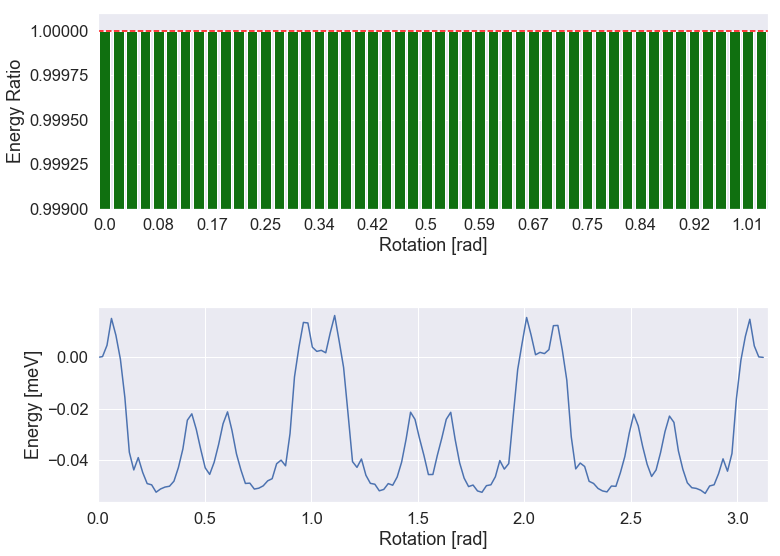

In [6]:
plot_convergence_test()

In [5]:
angle1 = 1e-04
angle2 = 1e-06
fill = 1010
scale1 = np.pi/150
scale2 = np.pi/150
map_df = filter_by_angle(angle1,filter_by_fill(fill))
map_df.sort_values("config",axis=0,inplace=True)
map2_df = filter_by_angle(angle2,filter_by_fill(fill))
map2_df.sort_values("config",axis=0,inplace=True)
map_df.config *= scale1
map2_df.config *= scale2



## Conclusions

1. EDIFF = 1-04 is sufficient


# Potential Maps vs Relative Angle

Now, look at potential maps for `fill` 1010 as a function of relative angle between the two water molecules. 

From interaction of dipoles in a vaccum

$$ V = p^2\cos\theta $$

it is expected that antiferro coupling ($\theta = \pi$) will be energetically most favorable.

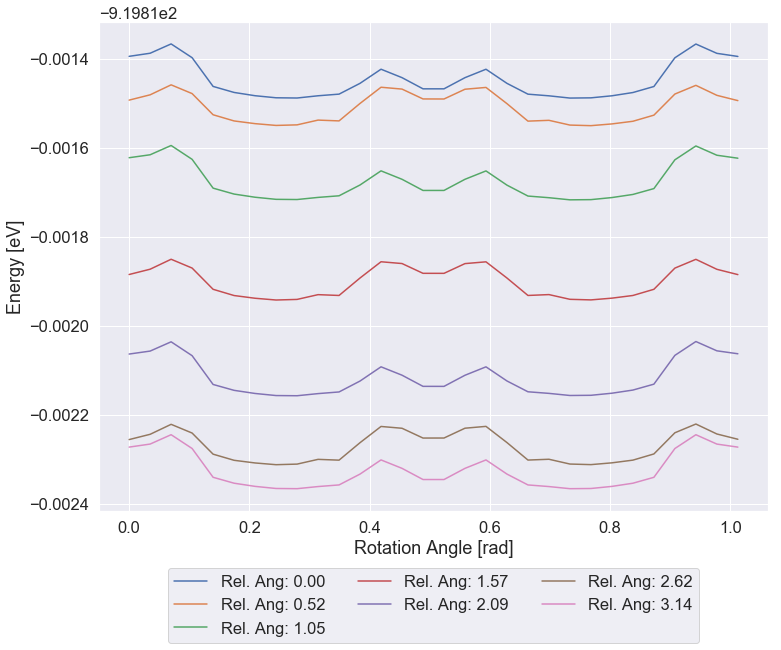

In [31]:
plot_relative_angle()


## Relative Angle Fit

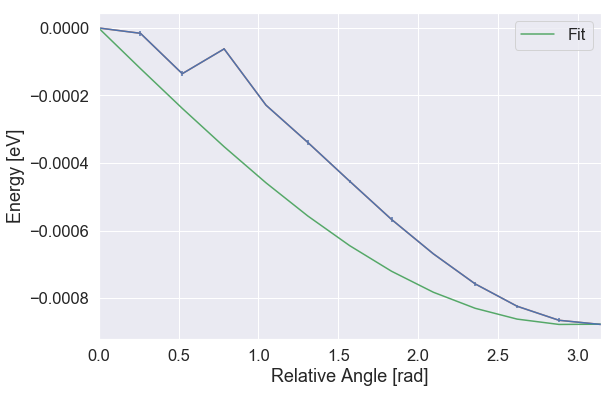

In [7]:
plot_relative_angle_fit()

## Zeroed Relative Angle Maps

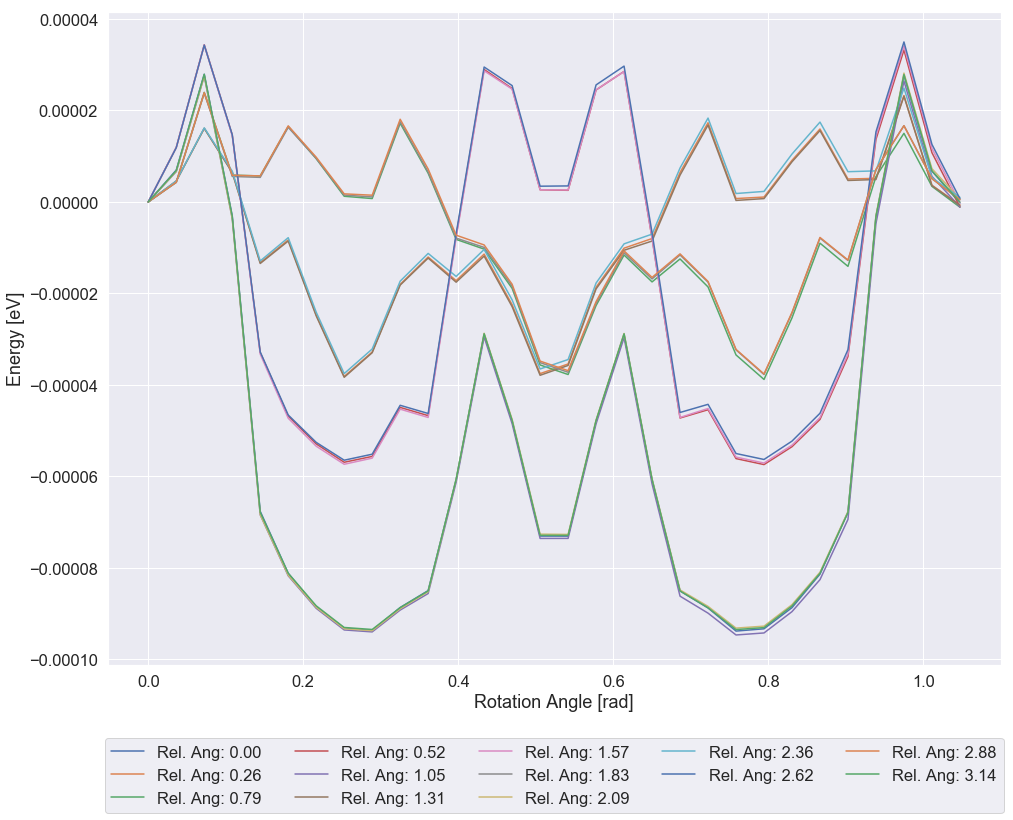

In [35]:
plot_zeroed_relative_angle()

## Conclusions

1. Overall, antiferro coupling is energetically preferred.

# Compare Zeroed Antiferro Maps

Here, each antiferro potential map is zeroed relative to the energy of the first position.


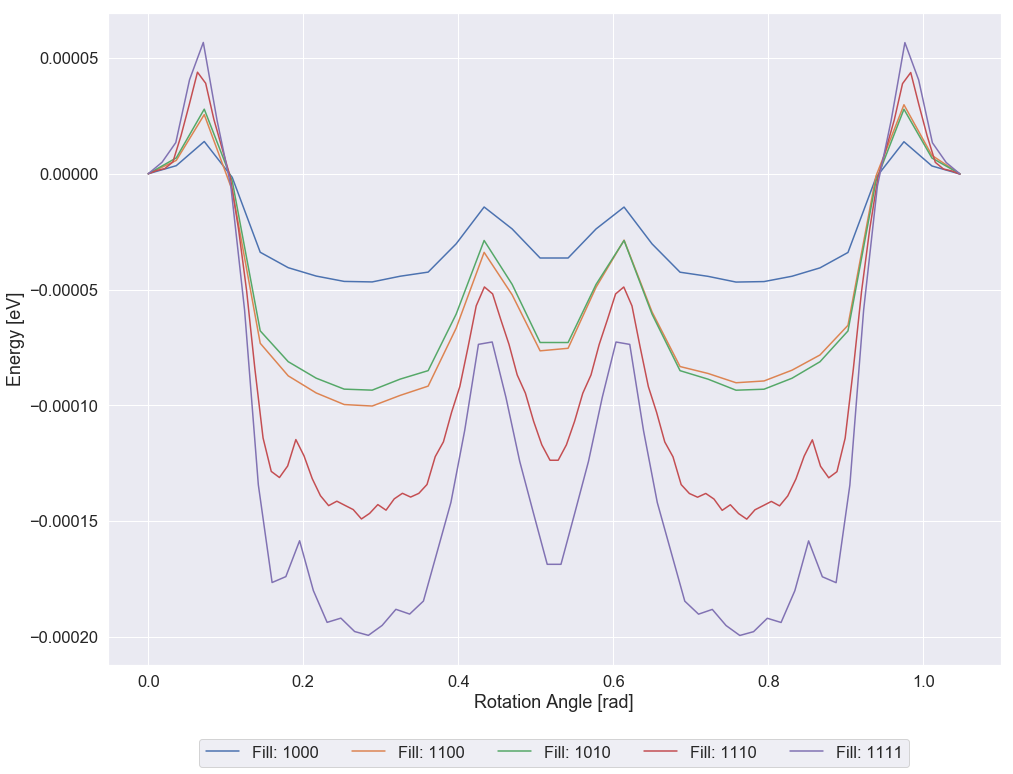

In [37]:
plot_zeroed_antiferro_comparison()

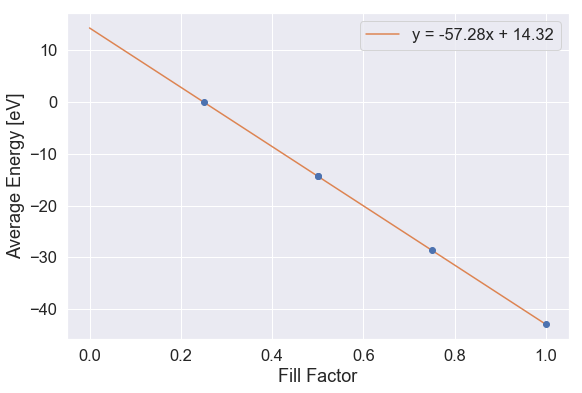

In [39]:
plot_average_antiferro_energy()

## Conclusions

1. Additional water molecules "deepen" potential map
2. Two 6-degenerate minima, one 12-degenerate minima
3. Sufficient to to scan $0\le \theta \le 0.6$ to capture all interesting features
    $\rightarrow$ fine sweep

In [11]:

df = filter_by_fill(1010,df=raw_df)


In [12]:
df = filter_by_fill(1110)
df = df[df.angle == 3.1415926536]
df.sort_values("config")
with open("tidy_data/pmap_antiferro_1110.pkl", "wb") as file_out:
    pkl.dump(df,file_out)
    print("Dumped")

Dumped


In [13]:
rm tidy_data/pmap_antiferro_1010.pkl

rm: tidy_data/pmap_antiferro_1010.pkl: No such file or directory
